# Business Understanding
Our example concerns a big company that wants to understand why some of their best and most experienced employees are leaving prematurely. 
The company also wishes to predict which valuable employees will leave next.



# Analytical Solution 
We have two goals: first, we want to understand why valuable employees leave, and second, we want to predict who will leave next.

Therefore, we propose to work with the HR department to gather relevant data about the employees and to communicate the significant effect that could explain and predict employees’ departure.

# Import necessary libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
plt.rcParams["figure.figsize"]=[15,10]
warnings.filterwarnings('ignore')
%matplotlib inline

# Reading the data

In [2]:
df=pd.read_csv('HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df.shape

(14999, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


# Distribution of target variable

In [6]:
left=df[df.left==1]
left.shape

(3571, 10)

In [7]:
retained=df[df.left==0]
retained.shape

(11428, 10)

<AxesSubplot:>

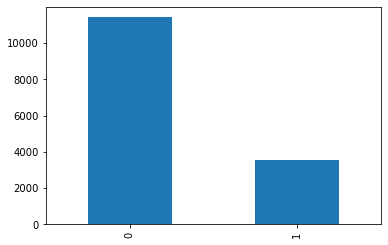

In [9]:
df["left"].value_counts().plot(kind="bar")

In [8]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


# Employees Retention mainly depends on :
1. satisfaction_level
2. average_montly_hours
3. promotion_last_5years
4. salary

<AxesSubplot:xlabel='salary'>

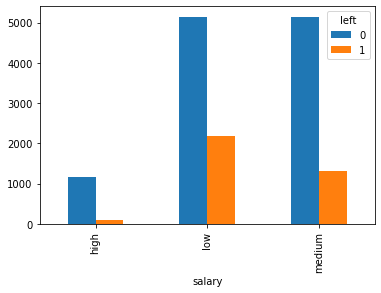

In [9]:
pd.crosstab(df.salary,df.left).plot(kind='bar')

<AxesSubplot:xlabel='promotion_last_5years'>

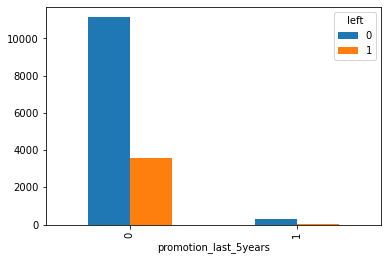

In [10]:
pd.crosstab(df.promotion_last_5years,df.left).plot(kind='bar')

<AxesSubplot:xlabel='Department'>

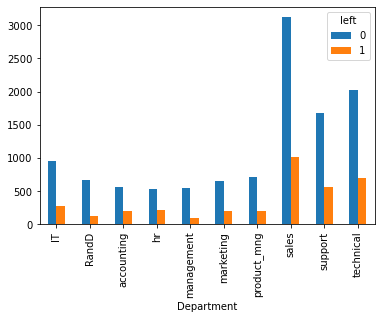

In [11]:
pd.crosstab(df.Department,df.left).plot(kind='bar')

# drawing boxplots to visualize outliers

Text(0, 0.5, 'time_spend_company')

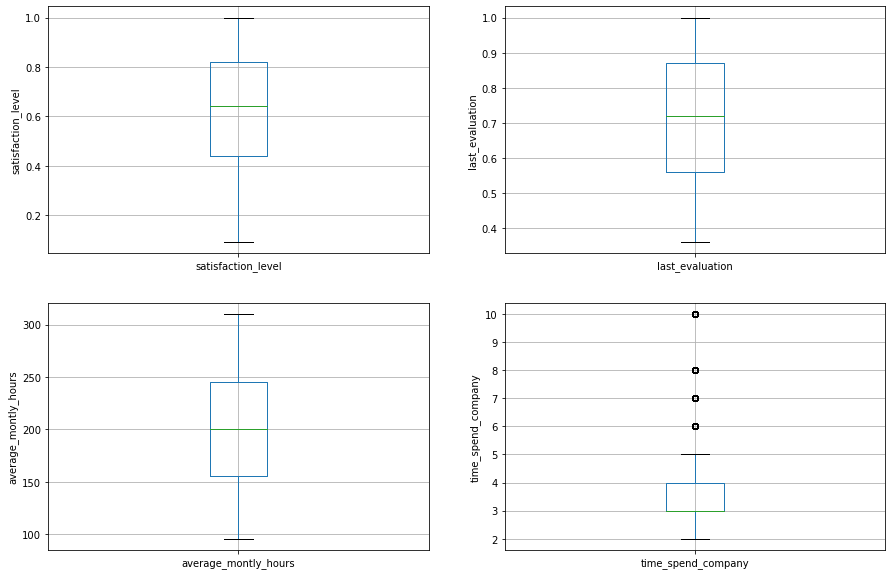

In [12]:
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='satisfaction_level')
fig.set_title('')
fig.set_ylabel('satisfaction_level')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='last_evaluation')
fig.set_title('')
fig.set_ylabel('last_evaluation')


plt.subplot(2, 2, 3)
fig = df.boxplot(column='average_montly_hours')
fig.set_title('')
fig.set_ylabel('average_montly_hours')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='time_spend_company')
fig.set_title('')
fig.set_ylabel('time_spend_company')

<AxesSubplot:xlabel='number_project'>

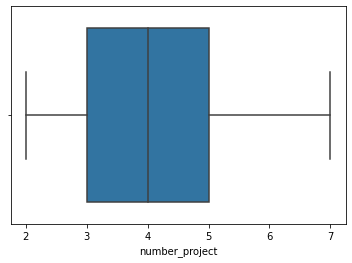

In [13]:
sns.boxplot(data=df,x="number_project")

In [14]:
df["Work_accident"].value_counts()

0    12830
1     2169
Name: Work_accident, dtype: int64

In [15]:
df["promotion_last_5years"].value_counts()

0    14680
1      319
Name: promotion_last_5years, dtype: int64

# checking multicollinearity

In [11]:
df[["satisfaction_level","last_evaluation","average_montly_hours"]].corr()

,satisfaction_level,last_evaluation,average_montly_hours
satisfaction_level,1.000000,0.105021,-0.020048
last_evaluation,0.105021,1.000000,0.339742
average_montly_hours,-0.020048,0.339742,1.000000


# checking distribution 

Text(0.5, 0, 'time_spend_company')

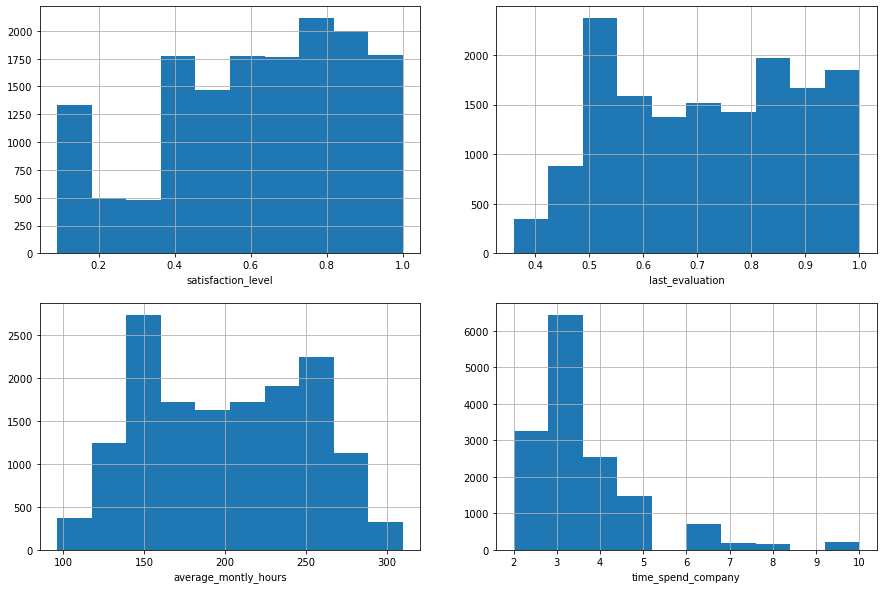

In [12]:
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.satisfaction_level.hist(bins=10)
fig.set_xlabel('satisfaction_level')


plt.subplot(2, 2, 2)
fig = df.last_evaluation.hist(bins=10)
fig.set_xlabel('last_evaluation')


plt.subplot(2, 2, 3)
fig = df.average_montly_hours.hist(bins=10)
fig.set_xlabel('average_montly_hours')


plt.subplot(2, 2, 4)
fig = df.time_spend_company.hist(bins=10)
fig.set_xlabel('time_spend_company')

# finding outliers in time_spend_company column

In [13]:
IQR = df.time_spend_company.quantile(0.75) - df.time_spend_company.quantile(0.25)
Lower_fence = df.time_spend_company.quantile(0.25) - (IQR * 3)
Upper_fence = df.time_spend_company.quantile(0.75) + (IQR * 3)
print(f'time_spend_company outliers are values < {Lower_fence} or > {Upper_fence}')

time_spend_company outliers are values < 0.0 or > 7.0


For time_spend_company, the minimum and maximum values are 2.0 and 10.0. So, the outliers are values > 7.0.

In [14]:
len(df[df["time_spend_company"]>7.0])

376

# treating outliers, replacing by max value

In [15]:
def max_value(df,variable, top):
    return np.where(df[variable]>top, top, df[variable])
df["time_spend_company"]=max_value(df,"time_spend_company",7.0)

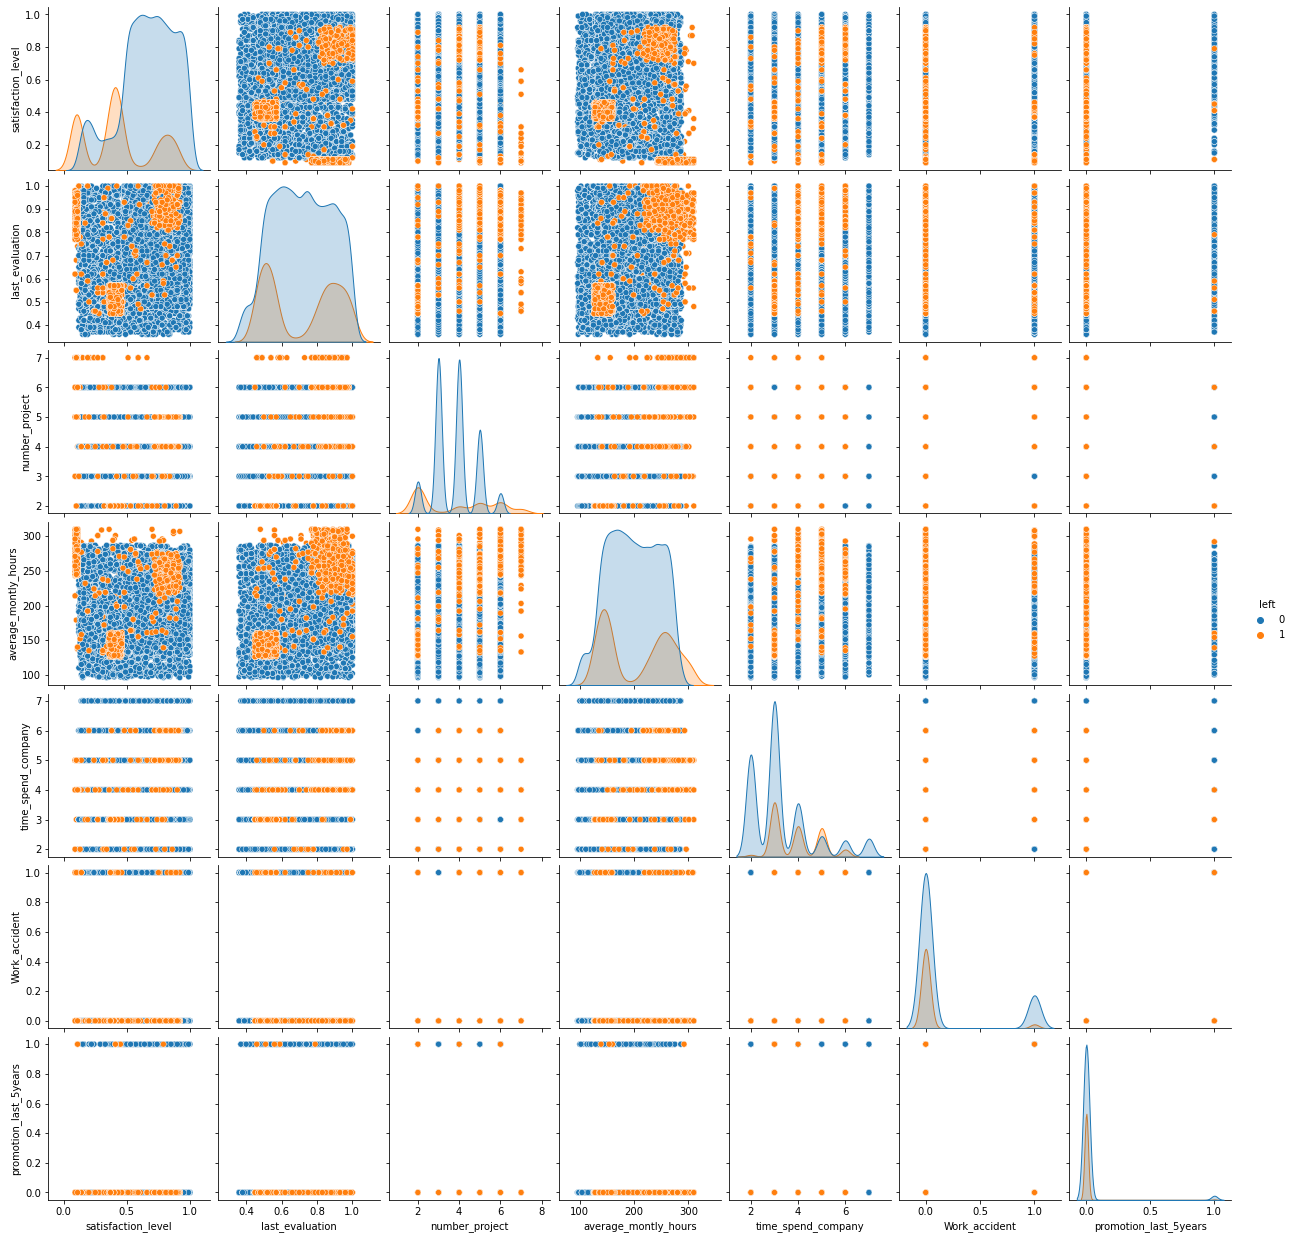

In [21]:
sns.pairplot(data=df, hue='left') #blue=0,orange=1

### none of the features is showing Guassian Distribution here. (except promotion_last_5_years althogh it has some outliers too)

In [16]:
X1=df.drop("left",axis=1)

In [17]:
dummies = pd.get_dummies(df.salary)

In [18]:
df1 = pd.concat([df,dummies],axis='columns')

In [19]:
df1.drop('salary',axis='columns',inplace=True)
df1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,high,low,medium
0,0.38,0.53,2,157,3.0,0,1,0,sales,0,1,0
1,0.80,0.86,5,262,6.0,0,1,0,sales,0,0,1
2,0.11,0.88,7,272,4.0,0,1,0,sales,0,0,1
3,0.72,0.87,5,223,5.0,0,1,0,sales,0,1,0
4,0.37,0.52,2,159,3.0,0,1,0,sales,0,1,0


# converting categorical salarey to numerical one by one hot encoding

In [20]:
dummies1 = pd.get_dummies(df.Department)

In [21]:
df2 = pd.concat([df1,dummies1],axis='columns')

In [22]:
df2.drop('Department',axis='columns',inplace=True)
df2.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,high,low,...,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3.0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6.0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4.0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5.0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3.0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [23]:
df2.shape

(14999, 21)

In [24]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  float64
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   high                   14999 non-null  uint8  
 9   low                    14999 non-null  uint8  
 10  medium                 14999 non-null  uint8  
 11  IT                     14999 non-null  uint8  
 12  RandD                  14999 non-null  uint8  
 13  accounting             14999 non-null  uint8  
 14  hr                     14999 non-null  uint8  
 15  ma

In [25]:
df2.to_csv("Model.csv")

In [26]:
X=df2.drop("left",axis=1)

In [27]:
y=df2["left"]


# train-test split

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,stratify=y)

# Feature scaling
We need to perform Feature Scaling when we are dealing with Gradient Descent Based algorithms (Linear and Logistic Regression, Neural Network) and Distance-based algorithms (KNN, K-means, SVM) as these are very sensitive to the range of the data points.

Rule-Normalize Non-Gaussian features and Standardize Gaussian-like features.
here,since all the features are having non-gaussian distributions,I am choosing MinMaxScaler (Normalizer) 

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear',random_state=0)

In [31]:
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.7890657554796233

In [32]:
model.score(X_test, y_test)

0.7863333333333333

# Changing the value of c
Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.

# c=100

In [33]:
# instantiate the model
model100 = LogisticRegression(C=100, solver='liblinear', random_state=0)

# fit the model
model100.fit(X_train, y_train)

LogisticRegression(C=100, random_state=0, solver='liblinear')

In [34]:
model100.score(X_train, y_train)

0.7899824985415451

In [35]:
model100.score(X_test, y_test)

0.7863333333333333

# c=0.01

In [36]:
# instantiate the model
model001 = LogisticRegression(C=0.01, solver='liblinear', random_state=0)

# fit the model
model001.fit(X_train, y_train)

LogisticRegression(C=0.01, random_state=0, solver='liblinear')

In [37]:
model001.score(X_train, y_train)

0.7761480123343611

In [38]:
model001.score(X_test, y_test)

0.7813333333333333

# c=0.001

In [39]:

# instantiate the model
model0001 = LogisticRegression(C=0.001, solver='liblinear', random_state=0)

# fit the model
model0001.fit(X_train, y_train)
model0001.score(X_train, y_train)
model0001.score(X_test, y_test)

0.762

# c=0.1

In [40]:
# instantiate the model
model1 = LogisticRegression(C=0.1, solver='liblinear', random_state=0)

# fit the model
model1.fit(X_train, y_train)
model1.score(X_train, y_train)
model1.score(X_test, y_test)

0.781

# searching best c using gridsearchcv

In [41]:
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2'],'solver':["liblinear"]}

In [42]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(model, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)
best_clf=clf.fit(X_train,y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


In [43]:
best_clf.best_estimator_

LogisticRegression(C=0.4393970560760795, penalty='l1', random_state=0,
                   solver='liblinear')

In [44]:
print (f'Accuracy - : {best_clf.score(X_train,y_train):.6f}')
print (f'Accuracy - : {best_clf.score(X_test,y_test):.6f}')

Accuracy - : 0.789232
Accuracy - : 0.787333


In [45]:
y_pred_test=best_clf.predict(X_test)
y_pred_test

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [46]:
# probability of getting output
best_clf.predict_proba(X_test)

array([[0.918819  , 0.081181  ],
       [0.46846077, 0.53153923],
       [0.95615081, 0.04384919],
       ...,
       [0.59049186, 0.40950814],
       [0.82896283, 0.17103717],
       [0.68168776, 0.31831224]])

In [47]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.7873


In [48]:

# check class distribution in test set

y_test.value_counts()

0    2286
1     714
Name: left, dtype: int64

In [50]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[2111  175]
 [ 463  251]]

True Positives(TP) =  2111

True Negatives(TN) =  251

False Positives(FP) =  175

False Negatives(FN) =  463


<AxesSubplot:>

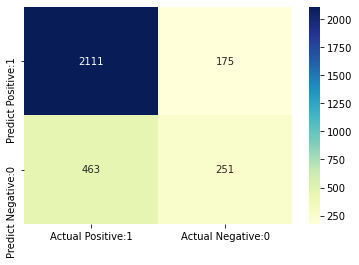

In [51]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True,fmt = 'd',cmap='YlGnBu')

In [52]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      2286
           1       0.59      0.35      0.44       714

    accuracy                           0.79      3000
   macro avg       0.70      0.64      0.65      3000
weighted avg       0.77      0.79      0.77      3000



In [53]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [54]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.7873


In [55]:


# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2127


In [56]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

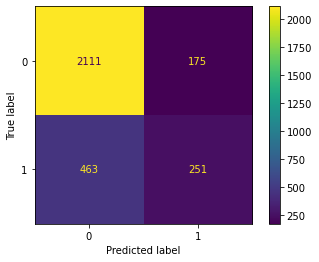

In [57]:
#plt.figure(figsize=(25,12))
cm = confusion_matrix(y_test, y_pred_test)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=best_clf.classes_)
disp.plot()
plt.show()

# Evaluation metric Cohen Kappa for Imbalanced Dataset

In [62]:
from sklearn.metrics import cohen_kappa_score,make_scorer

In [59]:
cohen_kappa_score(y_test,best_clf.predict(X_test))

0.3192662586532141

In [63]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(best_clf,X_test,y_test,scoring=make_scorer(cohen_kappa_score),cv=5,n_jobs=-1)

In [64]:
cv_score.mean()

0.2694679271210764

# So, we will use XGBOOST to improve the score